# European, American, and Bermuda
we have learnt that for a European option, the
option buyer could exercise their right only on maturity dates, while for an American
option buyer, they could exercise their right any time before and on maturity
dates. Thus, an American option would be more valuable than its counterparty of
European option. Bermudan options could be exercised once or several times on a
few predetermined dates. Consequently, the price of a Bermudan option should be
between a European and an American option with the same features, such as the
same maturity dates and the same exercises prices, see the following two inequalities
for call options:
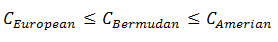

Here is an example for a Bermudan option. Assume that a company issues a 10-year
bond. After seven years, the company could call back, that is, retire, the bond at
the end of each year for the next three years. This callable property is eventually an
embedded Bermudan option with exercise dates in December of years 8, 9, and 10.
First, let's look at the Python program for an American call by using the binomial
model:

In [1]:
def binomialCallAmerican(s,x,T,r,sigma,n=100):
    from math import exp,sqrt
    import numpy as np
    deltaT = T /n
    u = exp(sigma * sqrt(deltaT))
    d = 1.0 / u
    a = exp(r * deltaT)
    p = (a - d) / (u - d)
    v = [[0.0 for j in np.arange(i + 1)] for i in np.arange(n + 1)]
    for j in np.arange(n+1):
        v[n][j] = max(s * u**j * d**(n - j) - x, 0.0)
    for i in np.arange(n-1, -1, -1):
        for j in np.arange(i + 1):
            v1=exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            v2=max(v[i][j]-x,0) # early exercise
            v[i][j]=max(v1,v2)
    return v[0][0]
s=40. # stock price today
x=40. # exercise price
T=6./12 # maturity date ii years
tao=1/12 # when to choose
r=0.05 # risk-free rate
sigma=0.2 # volatility
n=1000 # number of steps
#
price=binomialCallAmerican(s,x,T,r,sigma,n)
print("American call =", price)

American call = 2.7549263174936502


Here is the Python program for a Bermudan call option. The key different is the
variable called T2, which contains the dates when the Bermudan option could
be exercised:

In [2]:
def callBermudan(s,x,T,r,sigma,T2,n=100):
    from math import exp,sqrt
    import numpy as np
    n2=len(T2)
    deltaT = T /n
    u = exp(sigma * sqrt(deltaT))
    d = 1.0 / u
    a = exp(r * deltaT)
    p = (a - d) / (u - d)
    v =[[0.0 for j in np.arange(i + 1)] for i in np.arange(n + 1)]
    for j in np.arange(n+1):
        v[n][j] = max(s * u**j * d**(n - j) - x, 0.0)
    for i in np.arange(n-1, -1, -1):
        for j in np.arange(i + 1):
            v1=exp(-r*deltaT)*(p*v[i+1][j+1]+(1.0-p)*v[i+1][j])
            for k in np.arange(n2):
                if abs(j*deltaT-T2[k])<0.01:
                    v2=max(v[i][j]-x,0) # potential early exercise
                else:
                    v2=0
                    v[i][j]=max(v1,v2)
    return v[0][0]
s=40. # stock price today
x=40. # exercise price
T=6./12 # maturity date ii years
r=0.05 # risk-free rate
sigma=0.2 # volatility
n=1000 # number of steps
T2=(3./12.,4./12.) # dates for possible early exercise
#
price=callBermudan(s,x,T,r,sigma,T2,n)
print("Bermudan call =", price)

Bermudan call = 2.7549263174936502


# Binary options
A binary option, or asset-or-nothing option, is a type of options in which the payoff
is structured to be either a fixed amount of compensation if the option expires in
the money, or nothing at all if the option expires out of the money. Because of this
property, we could apply Monte Carlo Simulation to find a solution. The Python
codes are given here:

In [5]:
import random
import scipy as sp
#
def terminalStockPrice(S, T,r,sigma):
    tao=random.gauss(0,1.0)
    terminalPrice=S * sp.exp((r - 0.5 * sigma**2)*T+sigma*sp.
    sqrt(T)*tao)
    return terminalPrice
#
def binaryCallPayoff(x, sT,payoff):
    if sT >= x:
        return payoff
    else:
        return 0.0
# input area
S = 40.0 # asset price
x = 40.0 # exercise price
T = 0.5 # maturity in years
r = 0.01 # risk-free rate
sigma = 0.2 # vol of 20%
fixedPayoff = 10.0 # payoff
nSimulations =10000 # number of simulations
#
payoffs=0.0
for i in range(nSimulations):
    sT = terminalStockPrice(S, T,r,sigma)
    payoffs += binaryCallPayoff(x, sT,fixedPayoff)
#
price = sp.exp(-r * T) * (payoffs / float(nSimulations))
print('Binary options call= %.8f' % price)

Binary options call= 4.79198010


# Pricing asian  (averrage) options
For example, a refinery is worried about oil, its major raw material, and price
movement in the next three months. They plan to hedge the potential price jumps in
crude oil. The company could buy a call option. However, since the firm consumes a
huge amount of crude oil every day, naturally it cares more about the average price
instead of just the terminal price on which a vanilla call option depends. For such
cases, average options will be more effective. Average options are a type of Asian
option. For an average option, its payoff is determined by the average underlying
prices over some predetermined period of time. There are two types of averages:
arithmetic average and geometric average. The payoff function of an Asian call
(average price) is given as follows:
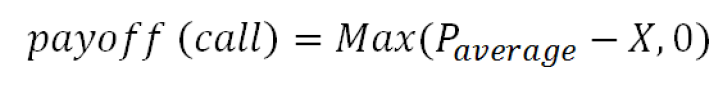

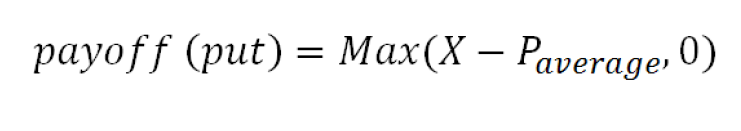

Asian options are one of the basic forms of exotic options. Another advantage of
Asian options is that their costs are cheaper compared to European and American
vanilla options since the variation of an average will be much smaller than a terminal
price. The following Python program is for an Asian option with an arithmetic
average price:

In [6]:
import scipy as sp
s0=30. # today stock price
x=32. # exercise price
T=3.0/12. # maturity in years
r=0.025 # risk-free rate
sigma=0.18 # volatility (annualized)
sp.random.seed(123) # fix a seed here
n_simulation=1000 # number of simulations
n_steps=500. # number of steps
#
dt=T/n_steps
call=sp.zeros([n_simulation], dtype=float)
for j in range(0, n_simulation):
    sT=s0
    total=0
    for i in range(0,int(n_steps)):
        e=sp.random.normal()
        sT*=sp.exp((r-0.5*sigma*sigma)*dt+sigma*e*sp.sqrt(dt))
        total+=sT
        price_average=total/n_steps
    call[j]=max(price_average-x,0)
#
call_price=sp.mean(call)*sp.exp(-r*T)
print('call price based on average price = ', round(call_price,3))

call price based on average price =  0.12


Pricing barrier options
Unlike the Black-Scholes-Merton option model's call and put options, which are
path-independent, a barrier option is path-dependent. A barrier option is similar in
many ways to an ordinary option, except a trigger exists. An in option starts its life
worthless unless the underlying stock reaches a predetermined knock-in barrier.
On the contrary, an out barrier option starts its life active and turns useless when a
knock-out barrier price is breached. In addition, if a barrier option expires inactive,
it may be worthless, or there may be a cash rebate paid out as a fraction of the
premium. The four types of barrier options are given as follows:
- Up-and-out: In this barrier option, the price starts from below a barrier level.
If it reaches the barrier, it is knocked out.
- Down-and-out: In this barrier option, the price starts from above a barrier. If
it reaches the barrier, it is knocked out.
- Up-and-in: In this barrier option, the price starts down a barrier and has to
reach the barrier to be activated.
- Down-and-in: In this barrier option, the price starts over a barrier and has to
reach the barrier to be activated.

The following Python program is for an up-and-out barrier option with a European call:

In [7]:
import scipy as sp
from scipy import log,exp,sqrt,stats
#
def bsCall(S,X,T,r,sigma):
    d1=(log(S/X)+(r+sigma*sigma/2.)*T)/(sigma*sqrt(T))
    d2 = d1-sigma*sqrt(T)
    return S*stats.norm.cdf(d1)-X*exp(-r*T)*stats.norm.cdf(d2)
#
def up_and_out_call(s0,x,T,r,sigma,n_simulation,barrier):
    n_steps=100.
    dt=T/n_steps
    total=0
    for j in sp.arange(0, n_simulation):
        sT=s0
        out=False
        for i in range(0,int(n_steps)):
            e=sp.random.normal()
            sT*=sp.exp((r-0.5*sigma*sigma)*dt+sigma*e*sp.sqrt(dt))
            if sT>barrier:
                out=True
            if out==False:
                total+=bsCall(s0,x,T,r,sigma)
    return total/n_simulation

The basic design is that we simulate the stock movement n times, such as 100 times.
For each simulation, we have 100 steps. Whenever the stock price reaches the barrier,
the payoff will be zero. Otherwise, the payoff will be a vanilla European call. The
final value will be the summation of all call prices that are not knocked out, divided
by the number of simulations, as shown in the following code:

In [9]:
s0=30. # today stock price
x=30. # exercise price
barrier=32 # barrier level
T=6./12. # maturity in years
r=0.05 # risk-free rate
sigma=0.2 # volatility (annualized)
n_simulation=100 # number of simulations
sp.random.seed(12) # fix a seed
#
result=up_and_out_call(s0,x,T,r,sigma,n_simulation,barrier)
print('up-and-out-call = ', round(result,3))

up-and-out-call =  128.089


The Python code for the down-and-in put option is shown as follows:

In [10]:
def down_and_in_put(s0,x,T,r,sigma,n_simulation,barrier):
    n_steps=100.
    dt=T/n_steps
    total=0
    for j in range(0, n_simulation):
        sT=s0
        in_=False
        for i in range(0,int(n_steps)):
            e=sp.random.normal()
            sT*=sp.exp((r-0.5*sigma*sigma)*dt+sigma*e*sp.sqrt(dt))
            if sT<barrier:
                in_=True
            #print 'sT=',sT
            #print 'j=',j ,'out=',out if in_==True:
            total+=bs_put(s0,x,T,r,sigma)
    return total/n_simulation

# Barrier in-and-out parity
If we buy an up-and-out European call and an up-and-in European call, then the
following parity should hold good:
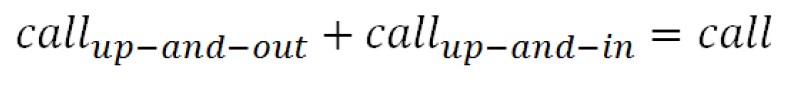

The logic is very simple—if the stock price reaches the barrier, then the first call is
worthless and the second call will be activated. If the stock price never touches the
barrier, the first call will remain active, while the second one is never activated. Either
way, one of them is active. The following Python program illustrates such scenarios:

In [11]:
def upCall(s,x,T,r,sigma,nSimulation,barrier):
    import scipy as sp
    import p4f
    n_steps=100
    dt=T/n_steps
    inTotal=0
    outTotal=0
    for j in range(0, nSimulation):
        sT=s
        inStatus=False
        outStatus=True
        for i in range(0,int(n_steps)):
            e=sp.random.normal()
            sT*=sp.exp((r-0.5*sigma*sigma)*dt+sigma*e*sp.sqrt(dt))
            if sT>barrier:
                outStatus=False
                inStatus=True
        if outStatus==True:
            outTotal+=bs_call(s,x,T,r,sigma)
        else:
            inTotal+=bs_call(s,x,T,r,sigma)
    return outTotal/nSimulation, inTotal/nSimulation

# Pricing lookback options with floating
strikes
The lookback options depend on the paths (history) travelled by the underlying
security. Thus, they are also called path-dependent exotic options. One of them is
named floating strikes. The payoff function of a call when the exercise price is the
minimum price achieved during the life of the option is given as follows: